#  Movie Dataset Analyse

### Athor: xxxxxxxxx
### Date: xxxxxxx
### Description: This notebook aims at preparing, analysing, modeling, predicting and visualizing the movie dataset

<font color='red' size='5' >Attetion: Before staring this notebook, </font>
<font color='blue'>
<p>you should download datasets_2745_4700_movies.csv if it does't exist.</p>
    
<p>you should scratch movie_directors_information.csv if it does't exist.</p>
<p>you should scratch gdps_1970_2024.csv if it does't exist.</p>
    
<p>This notebook doesn't contain any scraching script, for the details of scraching part, you should read the parsering files and the README file</p>
<p>This notebook doesn't contain any scraching script, for the details of scraching part, you should read the parsering files and the README file</p>
</font>

## Part I. Data Preprocessing

###  1. Datasets Explication
<ol>
<li>datasets_2745_4700_movies.csv
    <p>(movie dataset, which is downloaded from Kaggle: <a> https://www.kaggle.com/danielgrijalvas/movies </a>)</p>    
</li>
<li>movie_directors_information.csv
    <p>(movie directors information dataset, which is scratched from wikipedia using
        <a> parser_director.py </a>)</p>
</li>
<li>gdps_1970_2024.csv
    <p>(world countries gdp dataset, which is scratched from wikipedia using
        <a> parser_gdp.py </a>)</p>    
</li>
</ol>

In [1]:
import pandas as pd
import numpy as np

### 2. Datasets Quick View

#### [1]  Movies Dataset

In [2]:
# get the columns of the DataFrame, attention: the file that we download from kaggle is encodes in "latin-1", not 'uft-8'
# we must precise the encode format
df1 = pd.read_csv('./datasets_2745_4700_movies.csv', sep=',' , encoding='latin-1', na_filter = False)
# show columns
df1.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year'],
      dtype='object')

In [3]:
# show the dataframe info
print(df1.info())
# show the first 3 rows
df1.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6820 entries, 0 to 6819
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   budget    6820 non-null   float64
 1   company   6820 non-null   object 
 2   country   6820 non-null   object 
 3   director  6820 non-null   object 
 4   genre     6820 non-null   object 
 5   gross     6820 non-null   float64
 6   name      6820 non-null   object 
 7   rating    6820 non-null   object 
 8   released  6820 non-null   object 
 9   runtime   6820 non-null   int64  
 10  score     6820 non-null   float64
 11  star      6820 non-null   object 
 12  votes     6820 non-null   int64  
 13  writer    6820 non-null   object 
 14  year      6820 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 799.3+ KB
None


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986


In [4]:
# show data types
df1.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

<font color="blue" size="4">
<p>Conclusion: from the code above, we know that Movies Dataset is downloaded from kaggle, it's already processed. So it's clean and consistent</p>
</font>

#### [2]  Directors Dataset

In [5]:
# get the columns of the DataFrame, attention: the file that we parsed from html is encodes in "latin-1", not 'uft-8'
# we must precise the encode format
df2 = pd.read_csv('./movie_directors_information.csv', sep=',' , encoding='latin-1', na_filter = False)
# show columns
df2.columns

Index(['Director', 'Education', 'Year Active', 'Birth Day', 'Birth Place',
       'Roles', 'Died', 'Link'],
      dtype='object')

In [6]:
# see the data info
print(df2.info())
# show the first 3 rows
df2.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Director     1874 non-null   object
 1   Education    1874 non-null   object
 2   Year Active  1874 non-null   object
 3   Birth Day    1874 non-null   object
 4   Birth Place  1874 non-null   object
 5   Roles        1874 non-null   object
 6   Died         1874 non-null   int64 
 7   Link         1874 non-null   object
dtypes: int64(1), object(7)
memory usage: 117.2+ KB
None


,Director,Education,Year Active,Birth Day,Birth Place,Roles,Died,Link
0,Dodo Abashidze,,19541988,1924-05-01,"Tbilisi, Georgian SSR, Georgia",Actor and film director,1,https://en.wikipedia.org/wiki/Dodo_Abashidze
1,George Abbott,,,1887-06-25,,Theatre producertheatre directorplaywrightscre...,1,https://en.wikipedia.org/wiki/George_Abbott
2,Jim Abrahams,,1972present,1944-05-10,"Shorewood, Wisconsin, U.S.","Film director, film producer, screenwriter",0,https://en.wikipedia.org/wiki/Jim_Abrahams


<font color='blue' size='4'>
we can see, beacause of the encode format, the column "Year Active" contains some unrecognized characters, and the other columns are not that clean, so we will make the data pretty and consistent. This can make our result more convincing.
</font>

In [7]:
def pretty(df):
    """
    make pretty the movie directors information using regex
    """
    df['Director'].replace(to_replace=r'\.*([^A-Za-z\.\s]+).*', value=r' ', regex=True, inplace=True)
    df['Director'] = df['Director'].str.strip()
    
    df['Education'].replace(to_replace=r'\.*([^A-Za-z\.\s]+).*', value=r' ', regex=True, inplace=True)
    df['Education'].replace(to_replace=r'(Education|education)+', value=r' ', regex=True, inplace=True)
    df['Education'] = df['Education'].str.strip()
    
    df['Year Active'].replace(to_replace=r'([^0-9-(present)])+', value=r' ', regex=True, inplace=True)
    df['Year Active'].replace(to_replace=r'([A-Za-z]+\s+[A-Za-z]*)', value=r'present', regex=True, inplace=True)
    df['Year Active'] = df['Year Active'].str.strip()
    df['Year Active'].replace(to_replace=r'(\s+)', value=r'-', regex=True, inplace=True)
    df['Year Active'].replace(to_replace=r'([^0-9-A-Za-z]+)', value=r'', regex=True, inplace=True)
    df['Year Active'] = df['Year Active'].str.strip()
    
    df['Birth Day'].replace(to_replace=r'([^0-9-]+)', value=r'', regex=True, inplace=True)
    df['Birth Day'] = df['Birth Day'].str.strip()
    
    df['Birth Place'].replace(to_replace=r'([^A-Za-z\.\s,]+)', value=r' ', regex=True, inplace=True)
    df['Birth Place'] = df['Birth Place'].str.strip()
    
    df['Roles'].replace(to_replace=r'([^A-Za-z\.\s,]+)', value=r' ', regex=True, inplace=True)
    df['Roles'] = df['Roles'].str.strip()
    
    return df

In [8]:
df2 = pretty(df2)

In [9]:
# show for 5 rows
df2.head(5)

,Director,Education,Year Active,Birth Day,Birth Place,Roles,Died,Link
0,Dodo Abashidze,,1954-1988,1924-05-01,"Tbilisi, Georgian SSR, Georgia",Actor and film director,1,https://en.wikipedia.org/wiki/Dodo_Abashidze
1,George Abbott,,,1887-06-25,,Theatre producertheatre directorplaywrightscre...,1,https://en.wikipedia.org/wiki/George_Abbott
2,Jim Abrahams,,1972-present,1944-05-10,"Shorewood, Wisconsin, U.S.","Film director, film producer, screenwriter",0,https://en.wikipedia.org/wiki/Jim_Abrahams
3,Abiola Abrams,,,1976-07-29,,"Author, filmmaker, TV personality",0,https://en.wikipedia.org/wiki/Abiola_Abrams
4,J. J. Abrams,Palisades Charter High School,1982-present,1966-06-27,"New York City, New York, U.S.","Director, producer, screenwriter, musician, co...",0,https://en.wikipedia.org/wiki/J._J._Abrams


<font color="blue" size="4">
<p>Conclusion: from the code above, we know that Directors Dataset is scratched from the internet by ourselves, it's not clean and not consistent. So we use regex to remove those illegal characters and cast its format. Now the Directors Dataset is ready</p>
</font>

#### [3]  World Countries GDP  Dataset

In [10]:
# get the columns of the DataFrame, attention: the file that we parsed from html is encodes in "latin-1", not 'uft-8'
# we must precise the encode format
df3 = pd.read_csv('./gdps_1970_2024.csv', sep=',' , encoding='latin-1', na_filter = False)
# show columns
df3.columns

Index(['Country (or dependent territory)', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [11]:
# show first 3 rows
df3.head(3)

,Country (or dependent territory),1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,"1,749","1,831","1,596","1,733","2,156","2,367","2,556","2,953","3,300",...,"19,687","19,454","20,235","19,585","19,990","20,682","21,928","23,577","25,450","27,608"
1,Albania,"2,266","2,331","2,398","2,467","2,537","2,610","2,686","2,761","2,842",...,"11,393","11,865","13,055","15,202","15,960","17,210","18,602","20,199","21,790","23,472"
2,Algeria,"5,167","5,376","7,193","9,250","13,290","15,591","17,790","21,038","26,433",...,"164,779","159,049","167,555","180,441","183,687","193,056","199,917","208,589","216,389","204,536"


In [12]:
# cast string to float
def cast(df):
    # Country alias
    df = df.rename(columns={"Country (or dependent territory)": "Country"})
    # cast string to float
    for col in df.columns.tolist()[1:]:
        df[col].replace(to_replace=r',', value=r'', regex=True, inplace=True)   
        df.loc[(df[col] == ''),col] = 0
        df[col] = df[col].astype(float)
        pass
    return df

In [13]:
df3 = cast(df3)

In [14]:
# show 3 rows after vasting
df3.head(3)

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Afghanistan,1749.0,1831.0,1596.0,1733.0,2156.0,2367.0,2556.0,2953.0,3300.0,...,19687.0,19454.0,20235.0,19585.0,19990.0,20682.0,21928.0,23577.0,25450.0,27608.0
1,Albania,2266.0,2331.0,2398.0,2467.0,2537.0,2610.0,2686.0,2761.0,2842.0,...,11393.0,11865.0,13055.0,15202.0,15960.0,17210.0,18602.0,20199.0,21790.0,23472.0
2,Algeria,5167.0,5376.0,7193.0,9250.0,13290.0,15591.0,17790.0,21038.0,26433.0,...,164779.0,159049.0,167555.0,180441.0,183687.0,193056.0,199917.0,208589.0,216389.0,204536.0


<font color="blue" size="4">
<p>Conclusion: from the code above, we know that GDP Dataset is scratched from the internet by ourselves, it's format is object (string), it's not what we need, so we cast it into float.</p>
</font>

### 3. Building  Dataset

<font color="blue" size="4">
Our Dataset has three sources: Movies Dataset (downloaded from Kaggle), Directors Dataset (scratched from Internet), GDP Dataset (scratched from Internet).
<p>We use Director's Name as the key to union Movies Dataset and Directors Dataset</p>
<p>We use Country Name as the key to union Movies Datsset and GDP Dataset</p>
</font>

In [15]:
# TODO: NAME Normalize if need

def normalize_country(df):
    """
    Normalize the country name
    """
    df.loc[df['country'] == 'USA', 'country'] = 'United States'
    df.loc[df['country'] == 'UK', 'country']  = 'United Kingdom'
    df.loc[df['country'] == 'West Germany', 'country'] = 'Germany'
    df.loc[df['country'] == 'Republic of Macedonia', 'country'] = 'Macedonia'
    df.loc[df['country'] == 'Federal Republic of Yugoslavia', 'country'] = 'Yugoslavia'
    
    return df

In [16]:
df1 = normalize_country(df1)
df2 = df2.rename(columns=str.lower)
df3 = df3.rename(columns=str.lower)

In [17]:
res1 = pd.merge(df1, df2, on='director', how='inner')

In [18]:
result = pd.merge(res1, df3, on='country', how='inner')

In [19]:
print(res1.shape, result.shape)

(3177, 22) (3177, 77)


In [20]:
print(df1.shape)

(6820, 15)


In [21]:
result.to_csv('my_dataset.csv', index=False)

In [22]:
result['country'].unique().tolist()

['United States',
 'Germany',
 'France',
 'United Kingdom',
 'Canada',
 'Australia',
 'Austria',
 'South Africa',
 'Ireland',
 'Czech Republic',
 'Spain',
 'Sweden',
 'China',
 'Switzerland',
 'Italy',
 'Netherlands',
 'Japan',
 'New Zealand',
 'Denmark',
 'Portugal',
 'Russia',
 'Yugoslavia',
 'India',
 'Iran',
 'Hong Kong',
 'Brazil',
 'Argentina',
 'Taiwan',
 'Mexico',
 'Peru',
 'Macedonia',
 'Malta',
 'Romania',
 'Belgium',
 'Thailand',
 'Indonesia']

In [23]:
result.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'released', 'runtime', 'score', 'star', 'votes', 'writer',
       'year', 'education', 'year active', 'birth day', 'birth place', 'roles',
       'died', 'link', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024'],
      dtype='object')

In [24]:
gdp_years = ['1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', '2024']

In [25]:
result[gdp_years].mean(axis=1)

0       1.016453e+07
1       1.016453e+07
2       1.016453e+07
3       1.016453e+07
4       1.016453e+07
            ...     
3172    2.905727e+05
3173    2.905727e+05
3174    2.030384e+05
3175    4.191910e+05
3176    4.191910e+05
Length: 3177, dtype: float64

In [26]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'GDP Distribution (1970-2024)')

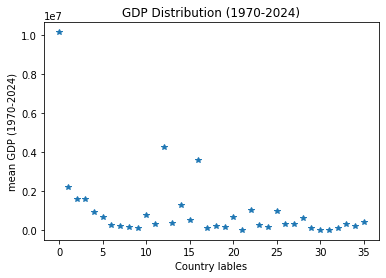

In [27]:
plt.plot(result[gdp_years].mean(axis=1).unique(), '*')
plt.xlabel("Country lables")
plt.ylabel("mean GDP (1970-2024)")
plt.title("GDP Distribution (1970-2024)")

Text(0.5, 1.0, 'GDP Distribution (1998)')

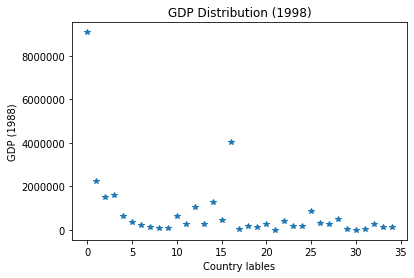

In [28]:
plt.plot(result["1998"].unique(), '*')
plt.xlabel("Country lables")
plt.ylabel("GDP (1988)")
plt.title("GDP Distribution (1998)")

Text(0.5, 1.0, 'GDP Distribution (2019)')

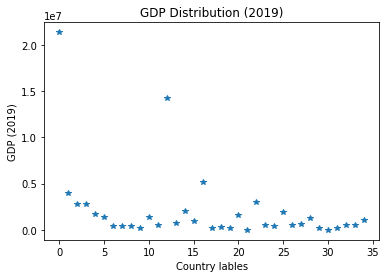

In [29]:
plt.plot(result["2019"].unique(), '*')
plt.xlabel("Country lables")
plt.ylabel("GDP (2019)")
plt.title("GDP Distribution (2019)")

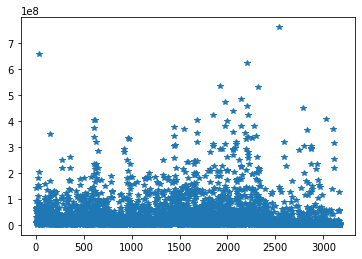

In [30]:
plt.plot(result["gross"], '*')

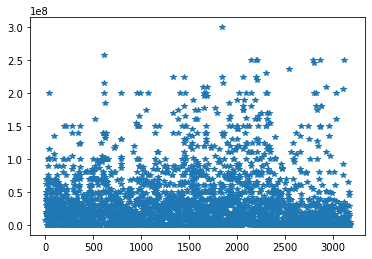

In [31]:
plt.plot(result["budget"], '*')

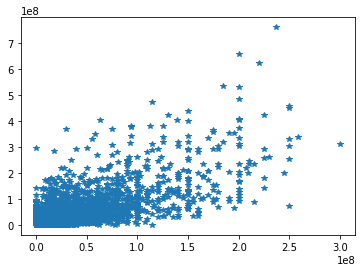

In [32]:
plt.plot(result["budget"], result["gross"], '*')

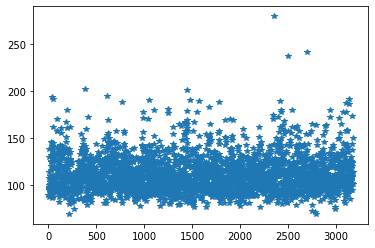

In [33]:
plt.plot(result["runtime"],'*')

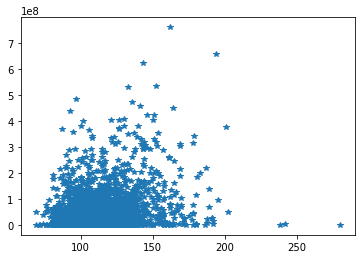

In [34]:
plt.plot(result["runtime"], result["gross"], '*')

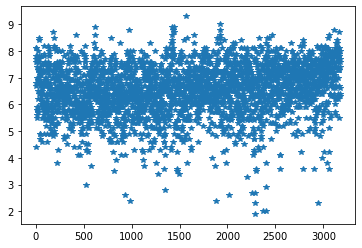

In [35]:
plt.plot(result["score"], '*')

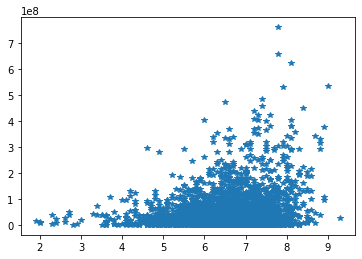

In [36]:
plt.plot(result["score"], result["gross"], '*')

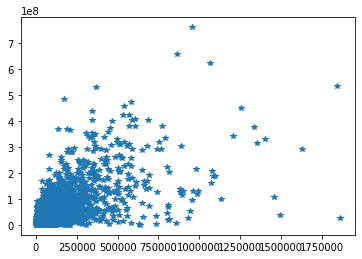

In [37]:
plt.plot(result["votes"], result["gross"], '*')

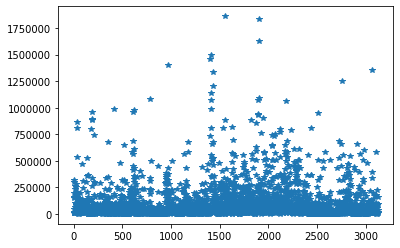

In [38]:
plt.plot(result["votes"].unique(), '*')

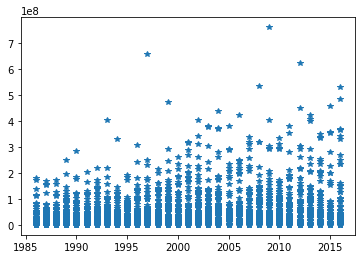

In [39]:
plt.plot(result["year"], result["gross"], '*')

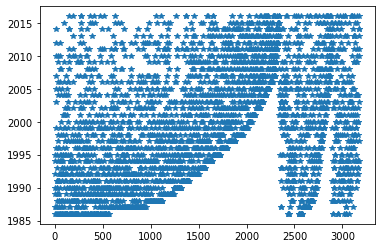

In [40]:
plt.plot(result["year"], '*')

In [41]:
result['name'].unique().tolist()

['Stand by Me',
 'The Princess Bride',
 'When Harry Met Sally...',
 'Misery',
 'A Few Good Men',
 'North',
 'The American President',
 'Ghosts of Mississippi',
 'The Story of Us',
 'Alex & Emma',
 'Rumor Has It...',
 'The Bucket List',
 'Flipped',
 'The Magic of Belle Isle',
 'And So It Goes',
 "Ferris Bueller's Day Off",
 'Planes, Trains & Automobiles',
 "She's Having a Baby",
 'Uncle Buck',
 'Curly Sue',
 'Top Gun',
 'Beverly Hills Cop II',
 'Days of Thunder',
 'Revenge',
 'The Last Boy Scout',
 'True Romance',
 'Crimson Tide',
 'The Fan',
 'Enemy of the State',
 'Man on Fire',
 'Deja Vu',
 'The Taking of Pelham 123',
 'Unstoppable',
 'Aliens',
 'The Abyss',
 'Terminator 2: Judgment Day',
 'True Lies',
 'Titanic',
 'Flight of the Navigator',
 'Big Top Pee-wee',
 'White Fang',
 'Honey I Blew Up the Kid',
 "It's My Party",
 'Lovewrecked',
 'Wall Street',
 'Talk Radio',
 'Born on the Fourth of July',
 'The Doors',
 'Natural Born Killers',
 'Nixon',
 'Any Given Sunday',
 'World Trade Cen

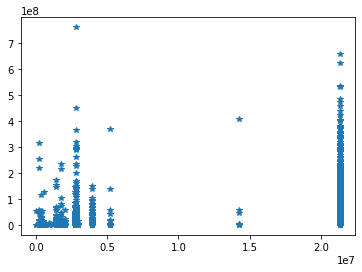

In [42]:
plt.plot(result["2019"], result["gross"], '*')

In [43]:
result.drop_duplicates().size

244629

## 3. Data Preprocessing
See the types of the data in Movies, most of them are "object"s (string). We need to convert them into numbers so that the ML models can recognize the data.

In [44]:
# print the data type
result.dtypes

budget      float64
company      object
country      object
director     object
genre        object
             ...   
2020        float64
2021        float64
2022        float64
2023        float64
2024        float64
Length: 77, dtype: object

In [45]:
from sklearn import preprocessing

def convert(df, col):
    """
    convert lables (string) to numbers
    input:
    df: dataframe
    col: column name
    return:
    converted dataframe
    """
    model = preprocessing.LabelEncoder()
    df[col] = model.fit_transform(df[col])
    classes =  list(model.classes_)
    #data = data.fillna(-9999)
    return df, classes

In [46]:
# covert all labels (string)

In [47]:
campany_convert, company_lables = convert(result, 'company')

In [48]:
country_convert, country_lables = convert(campany_convert, 'country')

In [49]:
director_convert, director_lables = convert(country_convert, 'director')

In [50]:
genre_convert, genre_lables = convert(director_convert, 'genre')

In [51]:
name_convert, name_lables = convert(genre_convert, 'name')

In [52]:
rating_convert, rating_lables = convert(name_convert, 'rating')

In [53]:
star_convert, star_lables = convert(rating_convert, 'star')

In [54]:
writer_convert, writer_lables = convert(star_convert, 'writer')

In [55]:
birth_place_convert, birth_place_lables = convert(writer_convert, 'birth place')

In [56]:
year_active_convert, year_active_lables = convert(birth_place_convert, 'year active')

In [57]:
birth_day_convert, birth_day_lables = convert(year_active_convert, 'birth day')

In [58]:
roles_convert, roles_lables = convert(birth_day_convert, 'roles')

In [59]:
# calculate mean gdp

In [60]:
result = roles_convert

In [61]:
result['gdp mean'] = result[gdp_years].mean(axis=1)

In [62]:
result_option = ['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
                 'rating', 'runtime', 'score', 'star', 'votes', 'writer','year', 
                 'year active', 'birth day', 'birth place', 'roles', 'died', 'gdp mean']

In [63]:
# result_convert
result_convert = result[result_option]

In [64]:
result_convert.columns

Index(['budget', 'company', 'country', 'director', 'genre', 'gross', 'name',
       'rating', 'runtime', 'score', 'star', 'votes', 'writer', 'year',
       'year active', 'birth day', 'birth place', 'roles', 'died', 'gdp mean'],
      dtype='object')

In [65]:
result_convert

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,year active,birth day,birth place,roles,died,gdp mean
0,8000000.0,302,34,519,1,52287414.0,2186,6,89,8.1,1221,299174,1765,1986,77,239,382,20,0,1.016453e+07
1,16000000.0,28,34,519,1,30857814.0,2725,4,98,8.1,171,320953,1955,1987,77,239,382,20,0,1.016453e+07
2,16000000.0,244,34,519,4,92823600.0,3074,6,96,7.6,117,161347,1408,1989,77,239,382,20,0,1.016453e+07
3,20000000.0,244,34,519,5,61276872.0,1578,6,107,7.8,483,147278,1765,1990,77,239,382,20,0,1.016453e+07
4,40000000.0,302,34,519,6,141340178.0,48,6,138,7.7,1167,196002,5,1992,77,239,382,20,0,1.016453e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3172,14000000.0,756,3,171,11,5981749.0,770,6,108,6.3,653,40462,155,2014,0,462,0,296,0,2.905727e+05
3173,28000000.0,314,3,463,6,1019038.0,163,6,137,6.4,728,22766,1455,2013,99,322,208,346,0,2.905727e+05
3174,0.0,605,32,38,4,183605.0,2983,2,114,6.6,1141,10329,1512,2010,129,581,27,203,0,2.030384e+05
3175,1100000.0,819,13,189,0,4105123.0,2733,6,101,7.6,459,160867,624,2011,142,636,163,232,0,4.191910e+05


## Part II. Data Modeling

### Predict 'Died' with SVM

In [66]:
X_option = ['year active', 'birth day', 'birth place']
y_option = ['died']

In [67]:
X = result_convert[X_option]
y = result_convert[y_option]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [70]:
from sklearn.svm import SVC

In [71]:
model = SVC(gamma=0.001, kernel='rbf')

In [72]:
model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_pred = model.predict(X_test)

In [74]:
model.score(X_test, y_test)

0.9559748427672956

In [76]:
estimated = pd.Series(y_pred, name='Estimated Values')
final_result = pd.concat([y_test.reset_index(drop=True), estimated.reset_index(drop=True)], axis=1)

In [77]:
final_result

,died,Estimated Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
790,0,0
791,0,0
792,0,0
793,0,0


### Predict 'Country' with SVM

In [79]:
X_option = ['company', 'director', 'gross', 'name', 'gdp mean']
y_option = ['country']

X = result_convert[X_option]
y = result_convert[y_option]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [80]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.740880503144654

In [81]:
estimated = pd.Series(y_pred, name='Estimated Values')
final_result = pd.concat([y_test.reset_index(drop=True), estimated.reset_index(drop=True)], axis=1)

In [82]:
final_result[500:1000]

,country,Estimated Values
500,34,34
501,34,34
502,8,34
503,34,34
504,34,34
...,...,...
790,34,34
791,34,34
792,34,34
793,34,34


In [83]:
estimated.unique()

array([34])

In [84]:
country_lables[34]

'United States'

In [85]:
 result_convert[result_convert['country'] == 34]

,budget,company,country,director,genre,gross,name,rating,runtime,score,star,votes,writer,year,year active,birth day,birth place,roles,died,gdp mean
0,8000000.0,302,34,519,1,52287414.0,2186,6,89,8.1,1221,299174,1765,1986,77,239,382,20,0,1.016453e+07
1,16000000.0,28,34,519,1,30857814.0,2725,4,98,8.1,171,320953,1955,1987,77,239,382,20,0,1.016453e+07
2,16000000.0,244,34,519,4,92823600.0,3074,6,96,7.6,117,161347,1408,1989,77,239,382,20,0,1.016453e+07
3,20000000.0,244,34,519,5,61276872.0,1578,6,107,7.8,483,147278,1765,1990,77,239,382,20,0,1.016453e+07
4,40000000.0,302,34,519,6,141340178.0,48,6,138,7.7,1167,196002,5,1992,77,239,382,20,0,1.016453e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,2000000.0,185,34,554,6,43282.0,1449,6,95,5.8,210,13654,1678,2014,129,635,208,12,0,1.016453e+07
2337,2000000.0,246,34,378,6,1477002.0,2435,6,102,6.9,94,22916,1511,2015,140,634,227,314,0,1.016453e+07
2338,0.0,33,34,262,4,240067.0,2461,6,105,6.1,506,5585,1102,2015,111,563,338,51,0,1.016453e+07
2339,6000000.0,549,34,23,6,177680.0,2322,6,118,5.4,1118,8340,76,2016,146,0,226,279,0,1.016453e+07


###  Predict 'Roles' with SVM

In [86]:
X_option = ['company', 'country', 'gross', 'name', 'year active', 'birth day', 'birth place', 'director', 'died']
y_option = ['roles']

X = result_convert[X_option]
y = result_convert[y_option]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model.fit(X_train, y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.06666666666666667

In [90]:
estimated = pd.Series(y_pred, name='Estimated Values')
final_result = pd.concat([y_test.reset_index(drop=True), estimated.reset_index(drop=True)], axis=1)

In [91]:
final_result

,roles,Estimated Values
0,143,295
1,301,295
2,113,295
3,149,295
4,344,295
...,...,...
790,124,295
791,52,295
792,266,295
793,341,295


## Part III. DataVisualizations

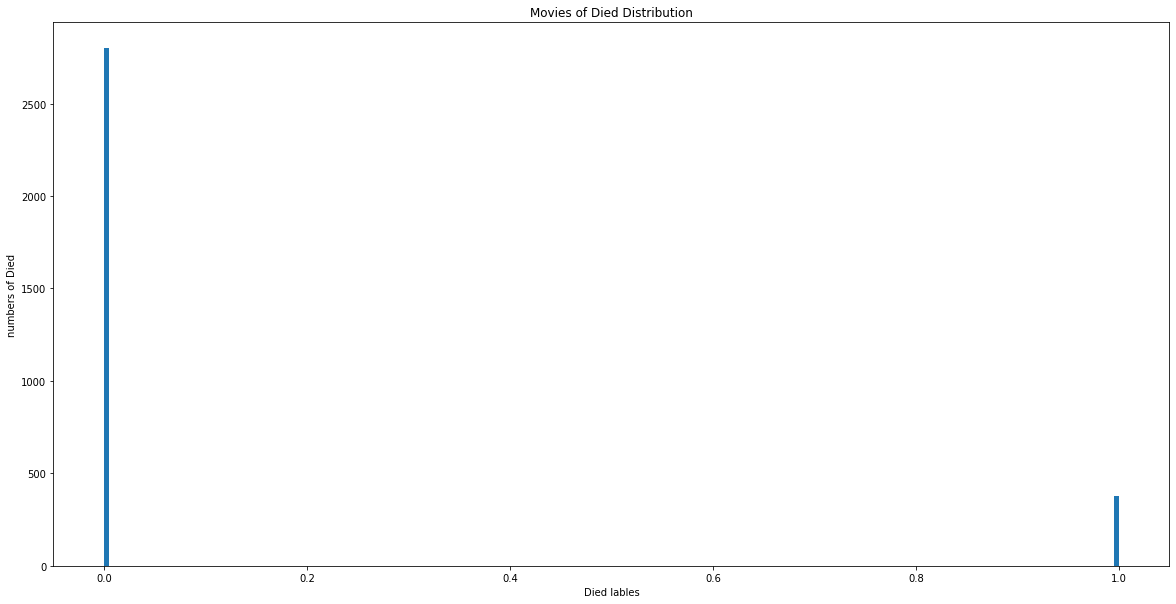

In [92]:
plt.figure(figsize=(20,10))
plt.hist(x=[result_convert.died], bins=200)
plt.xlabel("Died lables")
plt.ylabel("numbers of Died")
plt.title("Movies of Died Distribution")
plt.show()

In [94]:
### Country Distributuon

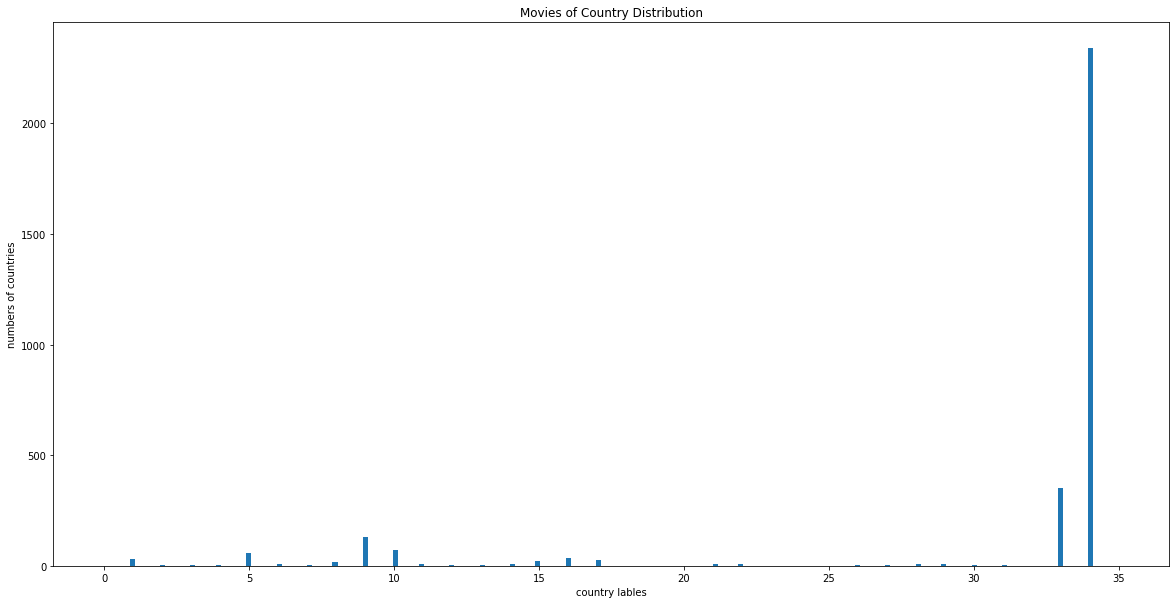

In [95]:
plt.figure(figsize=(20,10))
plt.hist(x=[result_convert.country], bins=200)
plt.xlabel("country lables")
plt.ylabel("numbers of countries")
plt.title("Movies of Country Distribution")
plt.show()

### Director Distribution

In [96]:
director_group = result_convert.groupby('director').size()

In [97]:
director_group

director
0      1
1      5
2      1
3      8
4      6
      ..
668    2
669    1
670    1
671    1
672    7
Length: 673, dtype: int64

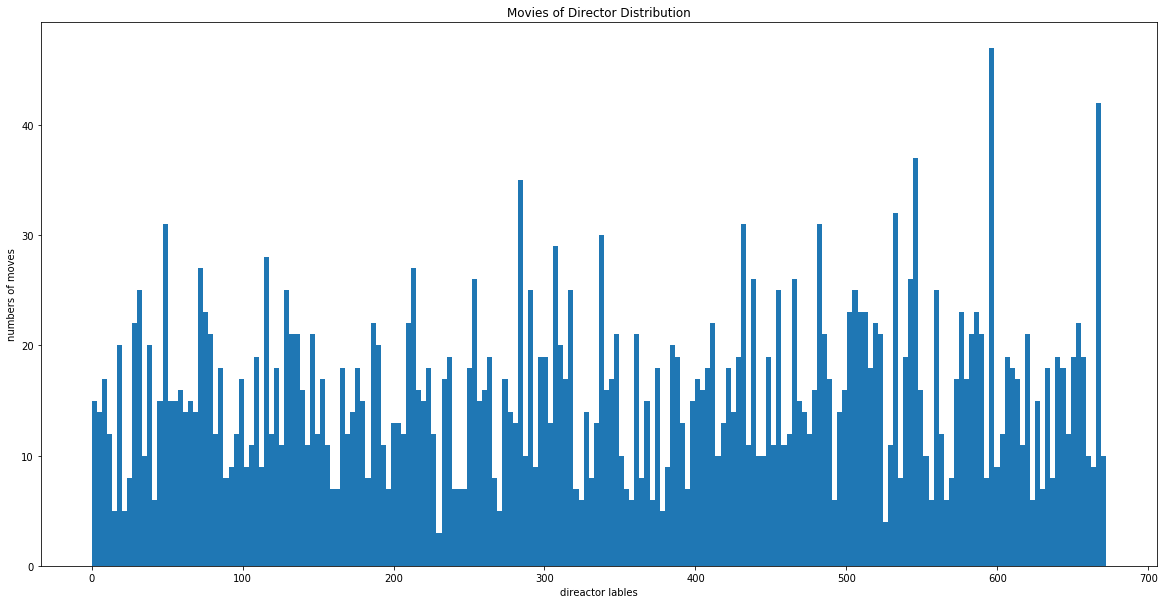

In [98]:
plt.figure(figsize=(20,10))
plt.hist(x=[result_convert.director], bins=200)
plt.xlabel("direactor lables")
plt.ylabel("numbers of moves")
plt.title("Movies of Director Distribution")
plt.show()

### Top 5 movies by score

In [99]:
movie_score = result_convert.groupby(['name'], as_index=False)
average_movie_score = movie_score.agg({'score':'mean'})
top_5_movies = average_movie_score.sort_values('score', ascending=False).head(5)

In [100]:
top_5_movies

,name,score
2774,2774,9.3
2419,2419,9.0
2019,2019,8.9
1870,1870,8.9
2622,2622,8.9


In [101]:
# print move names
for name_label in top_5_movies['name'].to_list():
    name = name_lables[name_label]
    print(name_label, ": ", name)

2774 :  The Shawshank Redemption
2419 :  The Dark Knight
2019 :  Schindler's List
1870 :  Pulp Fiction
2622 :  The Lord of the Rings: The Return of the King


### Movie Genre cluster by director

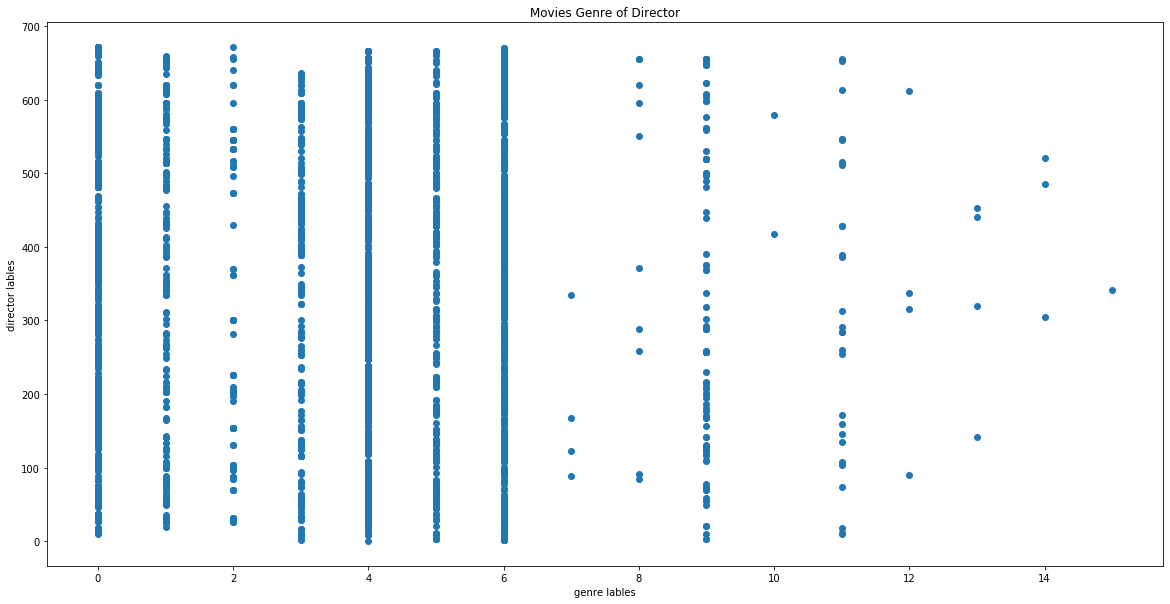

In [102]:
plt.figure(figsize=(20,10))
plt.scatter(x=result_convert['genre'], y=result_convert['director'])
plt.xlabel("genre lables")
plt.ylabel("director lables")
plt.title("Movies Genre of Director")
plt.show()

In [103]:
list(result_convert['genre'].unique())

[1, 4, 5, 6, 0, 3, 9, 8, 10, 11, 2, 7, 14, 12, 15, 13]

In [104]:
genre_lables

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War']

### Movie Genre cluster by company

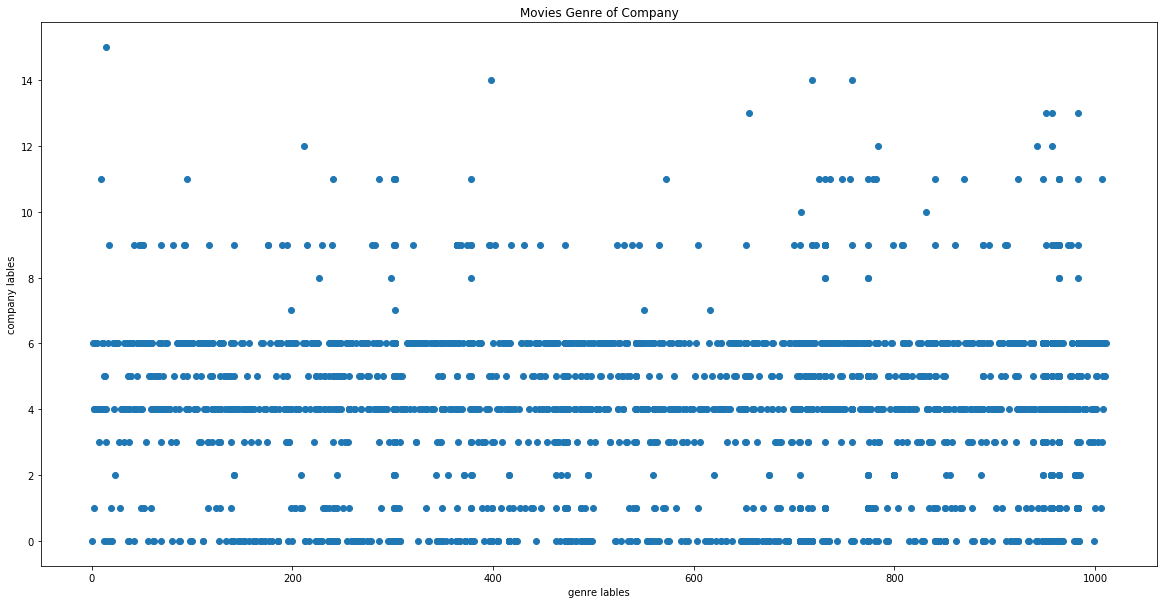

In [105]:
plt.figure(figsize=(20,10))
plt.scatter(x=result_convert['company'], y=result_convert['genre'])
plt.xlabel("genre lables")
plt.ylabel("company lables")
plt.title("Movies Genre of Company")
plt.show()

# Movie Distribution of Company, Country, Director, Genre

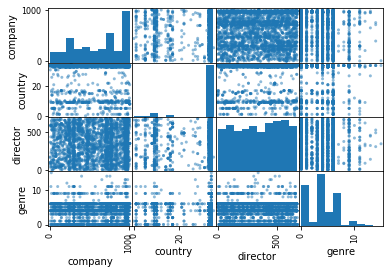

In [106]:
from pandas.plotting import scatter_matrix
scatter_matrix(result_convert[['company', 'country', 'director', 'genre']])
plt.show()

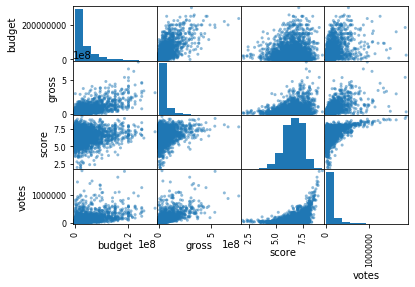

In [103]:
from pandas.plotting import scatter_matrix
scatter_matrix(result_convert[['budget', 'gross', 'score', 'votes']])
plt.show()